In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from pandas.plotting import table
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text
from PIL import Image
import urllib
from sqlalchemy import create_engine

In [82]:
Goals = "https://www.fotmob.com/leagues/47/stats/season/{}/players/goals/team/{}"
Assists = "https://www.fotmob.com/leagues/47/stats/season/{}/players/goal_assist/team/{}"
GoalsPlusAssists = "https://www.fotmob.com/leagues/47/stats/season/{}/players/_goals_and_goal_assist/team/{}"
Goalsper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/goals_per_90/team/{}"
ShotsOnTargetper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/ontarget_scoring_att/team/{}"
Shotsper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/total_scoring_att/team/{}"
AccuratePassesper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/accurate_pass/team/{}"
BigChancesCreated = "https://www.fotmob.com/leagues/47/stats/season/{}/players/big_chance_created/team/{}"
ChancesCreated = "https://www.fotmob.com/leagues/47/stats/season/{}/players/total_att_assist/team/{}"
AccurateLongBallsper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/accurate_long_balls/team/{}"
SuccessfulDribblesper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/won_contest/team/{}"
BigChancesMissed = "https://www.fotmob.com/leagues/47/stats/season/{}/players/big_chance_missed/team/{}"
PenaltiesWon = "https://www.fotmob.com/leagues/47/stats/season/{}/players/penalty_won/team/{}"
SuccessfulTacklesper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/won_tackle/team/{}"
Interceptionsper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/interception/team/{}"
Clearancesper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/effective_clearance/team/{}"
Blocksper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/outfielder_block/team/{}"
PossessionWonInFinal3rdper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/poss_won_att_3rd/team/{}"
CleanSheets = "https://www.fotmob.com/leagues/47/stats/season/{}/players/clean_sheet/team/{}"
SavePercentage = "https://www.fotmob.com/leagues/47/stats/season/{}/players/_save_percentage/team/{}"
Savesper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/saves/team/{}"
GoalsPrevented = "https://www.fotmob.com/leagues/47/stats/season/{}/players/_goals_prevented/team/{}"
GoalsConcededper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/goals_conceded/team/{}"
FoulsCommittedper90 = "https://www.fotmob.com/leagues/47/stats/season/{}/players/fouls/team/{}"
YellowCards = "https://www.fotmob.com/leagues/47/stats/season/{}/players/yellow_card/team/{}"
RedCards = "https://www.fotmob.com/leagues/47/stats/season/{}/players/red_card/team/{}"

In [2]:
stats_to_analyse = ["Goals", "Assists", "Goals Plus Assists", "Goals per 90", "Shots on Target per 90", "Shots per 90", "Accurate Passes per 90", "Big Chances Created", "Chances Created", "Accurate Long Balls per 90", "Successful Dribbles per 90", "Big Chances Missed", "Penalties Won", "Successful Tackles per 90", "Interceptions per 90", "Clearances per 90", "Blocks per 90", "Possession Won In Final 3rd per 90", "Clean Sheets", "Save Percentage", "Saves per 90", "Goals Prevented", "Goals Conceded per 90", "Fouls Committed per 90", "Yellow Cards", "Red Cards"]

In [85]:
def scraper(url1, url2, url3, url4, url5, url6, url7, url8, url9, url10, url11, url12, url13, url14, url15, url16, url17, url18, url19, url20, url21, url22, url23, url24, url25, url26, stats_to_analyse):
   
    teams_to_analyse = {"Liverpool": 8650, "Arsenal": 9825, "Manchester City": 8456, 
                        "Manchester United": 10260, "Chelsea": 8455, "Tottenham Hotspur": 8586,
                       "West Ham United": 8654, "Brighton": 10204, "Leicester": 8197,
                       "Wolves": 8602, "Newcastle United": 10261, "Crystal Palace": 9826,
                       "Brentford": 9937, "Aston Villa": 10252, "Southampton": 8466,
                       "Everton": 8668, "Leeds United": 8463, "Burnley": 8191, 
                       "Watford": 9817, "Norwich": 9850, "Fulham": 9879, 
                       "West Brom": 8659, "Sheffield United": 8657, "Bournemouth": 8678,
                       "Huddersfield": 9796, "Cardiff": 8344, "Swansea": 10003, 
                       "Stoke City": 10194, "Hull City": 8667, "Middlesbrough": 8549, 
                       "Sunderland": 8472}
        
    dictionary = {} 
    for i in range(2022, 2016, -1):
        dictionary[i] = {}
        for team in teams_to_analyse:
            dictionary[i][team] = {}
    
    YearCode = [16390, 15382, 14022, 12776, 11522, 10418]
            
    for team in teams_to_analyse:
        TeamCode = teams_to_analyse[team]
        
        for st in stats_to_analyse:

            players_all_years = []
            stat_all_years = []

            for code in YearCode:
            
                if st == stats_to_analyse[0]:
                    URL = url1.format(code, TeamCode)
                if st == stats_to_analyse[1]:
                    URL = url2.format(code, TeamCode)
                if st == stats_to_analyse[2]:
                    URL = url3.format(code, TeamCode)
                if st == stats_to_analyse[3]:
                    URL = url4.format(code, TeamCode)
                if st == stats_to_analyse[4]:
                    URL = url5.format(code, TeamCode)
                if st == stats_to_analyse[5]:
                    URL = url6.format(code, TeamCode)
                if st == stats_to_analyse[6]:
                    URL = url7.format(code, TeamCode)
                if st == stats_to_analyse[7]:
                    URL = url8.format(code, TeamCode)
                if st == stats_to_analyse[8]:
                    URL = url9.format(code, TeamCode)
                if st == stats_to_analyse[9]:
                    URL = url10.format(code, TeamCode)
                if st == stats_to_analyse[10]:
                    URL = url11.format(code, TeamCode)
                if st == stats_to_analyse[11]:
                    URL = url12.format(code, TeamCode)
                if st == stats_to_analyse[12]:
                    URL = url13.format(code, TeamCode)
                if st == stats_to_analyse[13]:
                    URL = url14.format(code, TeamCode)
                if st == stats_to_analyse[14]:
                    URL = url15.format(code, TeamCode)
                if st == stats_to_analyse[15]:
                    URL = url16.format(code, TeamCode)
                if st == stats_to_analyse[16]:
                    URL = url17.format(code, TeamCode)
                if st == stats_to_analyse[17]:
                    URL = url18.format(code, TeamCode)
                if st == stats_to_analyse[18]:
                    URL = url19.format(code, TeamCode)
                if st == stats_to_analyse[19]:
                    URL = url20.format(code, TeamCode)
                if st == stats_to_analyse[20]:
                    URL = url21.format(code, TeamCode)
                if st == stats_to_analyse[21]:
                    URL = url22.format(code, TeamCode)
                if st == stats_to_analyse[22]:
                    URL = url23.format(code, TeamCode)
                if st == stats_to_analyse[23]:
                    URL = url24.format(code, TeamCode)
                if st == stats_to_analyse[24]:
                    URL = url25.format(code, TeamCode)
                if st == stats_to_analyse[25]:
                    URL = url26.format(code, TeamCode)
            
                page = requests.get(URL)
                soup = BeautifulSoup(page.content, "html.parser")
                results = soup.find(id="__next")

                player_name_tag = results.find_all("a", class_="css-r1t9bp-StyledLink-applyHover e1fvh723")
                players = []
                for i,j in enumerate(player_name_tag):
                    players.append(player_name_tag[i].getText())

                players_all_years.append(players)

                stat_tag = results.find_all("td", class_="MuiTableCell-root MuiTableCell-body jss7 jss9 jss11 css-1la9ly1-TableCell e1fvh724")
                stat = []
                for i,j in enumerate(stat_tag):
                    stat.append(stat_tag[i].getText())

                stat_all_years.append(stat)
            
            players_stat_all_years = list(zip(players_all_years, stat_all_years))
            
            count = 2022      
            for a,b in players_stat_all_years:
                dictionary[count][team][st] = {}
                for i,j in enumerate(b):
                    if b[i][-1] == '%':
                        dictionary[count][team][st][a[i]] = float(b[i][:-1])
                    else:
                        dictionary[count][team][st][a[i]] = float(b[i])
                count -= 1

    return dictionary 

In [86]:
# z = scraper(Goals, Assists, GoalsPlusAssists, Goalsper90, ShotsOnTargetper90, Shotsper90, AccuratePassesper90, BigChancesCreated, ChancesCreated, AccurateLongBallsper90, SuccessfulDribblesper90, BigChancesMissed, PenaltiesWon, SuccessfulTacklesper90, Interceptionsper90, Clearancesper90, Blocksper90, PossessionWonInFinal3rdper90, CleanSheets, SavePercentage, Savesper90, GoalsPrevented, GoalsConcededper90, FoulsCommittedper90, YellowCards, RedCards, stats_to_analyse)

In [209]:
# json_object = json.dumps(z, indent = 4) 
# print(json_object)

{
    "2022": {
        "Liverpool": {
            "Goals": {
                "Mohamed Salah": 23.0,
                "Sadio Man\u00e9": 16.0,
                "Diogo Jota": 15.0,
                "Roberto Firmino": 5.0,
                "Fabinho": 5.0,
                "Luis Diaz": 4.0,
                "Andrew Robertson": 3.0,
                "Divock Origi": 3.0,
                "Joel Matip": 3.0,
                "Naby Keita": 3.0,
                "Takumi Minamino": 3.0,
                "Virgil van Dijk": 3.0,
                "Alex Oxlade-Chamberlain": 2.0,
                "Jordan Henderson": 2.0,
                "Trent Alexander-Arnold": 2.0
            },
            "Assists": {
                "Mohamed Salah": 13.0,
                "Trent Alexander-Arnold": 12.0,
                "Andrew Robertson": 10.0,
                "Jordan Henderson": 5.0,
                "Diogo Jota": 4.0,
                "Roberto Firmino": 4.0,
                "Thiago Alc\u00e1ntara": 4.0,
                "Joel 

In [3]:
f = open("PLData_Final.json")
data = json.load(f)
data
f.close()

In [140]:
def dataframe(jsonobj):
    
    df = pd.DataFrame(columns=["Year", "Club", "Player",
                               "Goals", "Assists", "Goals Plus Assists", 
                               "Goals per 90", "Shots on Target per 90", "Shots per 90", 
                               "Accurate Passes per 90", "Big Chances Created", "Chances Created", 
                               "Accurate Long Balls per 90", "Successful Dribbles per 90", "Big Chances Missed",
                               "Penalties Won", "Successful Tackles per 90", "Interceptions per 90",
                               "Clearances per 90", "Blocks per 90", "Possession Won In Final 3rd per 90",
                               "Clean Sheets", "Save Percentage", "Saves per 90", "Goals Prevented",
                               "Goals Conceded per 90", "Fouls Committed per 90",
                               "Yellow Cards", "Red Cards"])

    dict_indexCol = {"Goals": 3, "Assists": 4, "Goals Plus Assists": 5, 
                               "Goals per 90": 6, "Shots on Target per 90":7,
                               "Shots per 90":8, "Accurate Passes per 90":9,
                               "Big Chances Created": 10, "Chances Created": 11, 
                               "Accurate Long Balls per 90": 12, "Successful Dribbles per 90": 13, 
                               "Big Chances Missed": 14, "Penalties Won": 15, 
                               "Successful Tackles per 90": 16, "Interceptions per 90": 17, 
                               "Clearances per 90": 18, "Blocks per 90": 19,
                               "Possession Won In Final 3rd per 90": 20, "Clean Sheets": 21,
                               "Save Percentage": 22, "Saves per 90": 23, "Goals Prevented": 24, 
                               "Goals Conceded per 90": 25, "Fouls Committed per 90": 26, 
                               "Yellow Cards": 27, "Red Cards": 28}

    for year in jsonobj:
        player_names = set()
        for club in jsonobj[year]:
            for stat in jsonobj[year][club]:
                for player in jsonobj[year][club][stat]:
                    if player not in player_names:
                        player_names.add(player)
                        new_row = {"Year": year, "Club": club, "Player": player, stat: jsonobj[year][club][stat][player]}
                        df = df.append(new_row, ignore_index=True) 
                    else:
                        index = df[(df["Player"] == player) & (df["Year"] == year)].index
                        df.iloc[index, dict_indexCol[stat]] = jsonobj[year][club][stat][player]

    df = df.set_index(["Year", "Club"])
    df = df.sort_index()
#     df.to_csv("PLData_Final2.csv")
    
    return df

In [141]:
df = dataframe(data)
df

Player  Goals  Assists  Goals Plus Assists  \
Year Club                                                           
2017 Arsenal   Alexis Sánchez   24.0     10.0                34.0   
     Arsenal   Olivier Giroud   12.0      3.0                15.0   
     Arsenal     Theo Walcott   10.0      2.0                12.0   
     Arsenal       Mesut Özil    8.0      9.0                17.0   
     Arsenal       Alex Iwobi    3.0      3.0                 6.0   
...                       ...    ...      ...                 ...   
2022 Wolves     Nélson Semedo    NaN      1.0                 1.0   
     Wolves           José Sá    NaN      1.0                 NaN   
     Wolves       Fabio Silva    NaN      NaN                 NaN   
     Wolves   Fernando Marcal    NaN      NaN                 NaN   
     Wolves    Ki-Jana Hoever    NaN      NaN                 NaN   

              Goals per 90  Shots on Target per 90  Shots per 90  \
Year Club                                                          
2017 Arsenal          0.67                     1.4           3.6   
     Arsenal          0.90                     1.5           2.9   
     Arsenal          0.47                     1.4           2.9   
     Arsenal          0.25                     0.6           1.3   
     Arsenal          0.18                     0.7           2.4   
...                    ...                     ...           ...   
2022 Wolves            NaN                     0.2           0.8   
     Wolves            NaN                     NaN           NaN   
     Wolves            NaN                     1.0           3.0   
     Wolves            NaN                     NaN           NaN   
     Wolves            NaN                     NaN           NaN   

              Accurate Passes per 90  Big Chances Created  Chances Created  \
Year Club                                                                    
2017 Arsenal                    33.8                 10.0             78.0   
     Arsenal                    19.9                  2.0             17.0   
     Arsenal                    18.9                  3.0             13.0   
     Arsenal                    57.8                  9.0            100.0   
     Arsenal                    48.3                  2.0             26.0   
...                              ...                  ...              ...   
2022 Wolves                     29.7                  1.0             18.0   
     Wolves                     15.3                  2.0              NaN   
     Wolves                     14.9                  1.0              NaN   
     Wolves                      NaN                  NaN             10.0   
     Wolves                      NaN                  NaN              NaN   

              ...  Blocks per 90  Possession Won In Final 3rd per 90  \
Year Club     ...                                                      
2017 Arsenal  ...            0.0                                 0.9   
     Arsenal  ...            0.3                                 0.4   
     Arsenal  ...            0.0                                 0.7   
     Arsenal  ...            0.0                                 0.7   
     Arsenal  ...            0.2                                 1.0   
...           ...            ...                                 ...   
2022 Wolves   ...            0.2                                 0.5   
     Wolves   ...            NaN                                 NaN   
     Wolves   ...            NaN                                 0.5   
     Wolves   ...            NaN                                 NaN   
     Wolves   ...            NaN                                 NaN   

              Clean Sheets  Save Percentage  Saves per 90  Goals Prevented  \
Year Club                                                                    
2017 Arsenal           NaN              NaN           NaN              NaN   
     Arsenal           NaN              NaN           

In [144]:
df_players_with_more_than_20_goals_in_a_season = df.loc[(df["Goals"] > 20), ["Player", "Goals", "Assists"]]
df_players_with_more_than_20_goals_in_a_season

Player  Goals  Assists
Year Club                                                        
2017 Arsenal                       Alexis Sánchez   24.0     10.0
     Everton                        Romelu Lukaku   25.0      6.0
     Tottenham Hotspur                 Harry Kane   29.0      7.0
2018 Liverpool                      Mohamed Salah   32.0     10.0
     Manchester City                Sergio Agüero   21.0      6.0
     Tottenham Hotspur                 Harry Kane   30.0      2.0
2019 Arsenal            Pierre-Emerick Aubameyang   22.0      5.0
     Liverpool                         Sadio Mané   22.0      1.0
     Liverpool                      Mohamed Salah   22.0      8.0
     Manchester City                Sergio Agüero   21.0      8.0
2020 Arsenal            Pierre-Emerick Aubameyang   22.0      3.0
     Leicester                        Jamie Vardy   23.0      5.0
     Southampton                       Danny Ings   22.0      2.0
2021 Liverpool                      Mohamed Salah   22.0      5.0
     Tottenham Hotspur                 Harry Kane   23.0     14.0
2022 Liverpool                      Mohamed Salah   23.0     13.0
     Tottenham Hotspur              Heung-Min Son   23.0      7.0

In [207]:
def top_performers(df, stats_to_analyse):
    
    df = df.reset_index()

    top_performers = []

    for stat in stats_to_analyse:

        index = df["{}".format(stat)].idxmax()
        year = df.iloc[index]["Year"]
        player = df.iloc[index]["Player"]
        number = df.iloc[index][stat]
        top_performers.append("{} ({}) - {}: {}".format(stat, year, player, number))
        
#     for item in top_performers:
#         print(item)

    return top_performers

In [208]:
top_performers(df, stats_to_analyse)

['Goals (2018) - Mohamed Salah: 32.0',
 'Assists (2020) - Kevin De Bruyne: 20.0',
 'Goals Plus Assists (2018) - Mohamed Salah: 42.0',
 'Goals per 90 (2017) - Michy Batshuayi: 1.88',
 'Shots on Target per 90 (2017) - Michy Batshuayi: 3.0',
 'Shots per 90 (2017) - Michy Batshuayi: 6.4',
 'Accurate Passes per 90 (2022) - Aymeric Laporte: 87.9',
 'Big Chances Created (2020) - Kevin De Bruyne: 33.0',
 'Chances Created (2020) - Kevin De Bruyne: 136.0',
 'Accurate Long Balls per 90 (2022) - Joachim Andersen: 7.8',
 'Successful Dribbles per 90 (2017) - Adama Traoré: 8.0',
 'Big Chances Missed (2020) - Gabriel Jesus: 24.0',
 'Penalties Won (2018) - Raheem Sterling: 6.0',
 'Successful Tackles per 90 (2017) - Idrissa Gana Gueye: 3.4',
 'Interceptions per 90 (2017) - Curtis Davies: 3.8',
 'Clearances per 90 (2017) - Steve Cook: 8.9',
 'Blocks per 90 (2022) - James Tarkowski: 1.8',
 'Possession Won In Final 3rd per 90 (2022) - Roberto Firmino: 1.8',
 'Clean Sheets (2019) - Alisson Becker: 21.0',
 '

In [147]:
LiverpoolGoals2022 = data["2022"]["Liverpool"]["Goals"]
xLiverpoolGoals2022 = [item for item in LiverpoolGoals2022.keys()]
yLiverpoolGoals2022 = [item for item in LiverpoolGoals2022.values()]

LiverpoolAssists2022 = data["2022"]["Liverpool"]["Assists"]
xLiverpoolAssists2022 = [item for item in LiverpoolAssists2022.keys()]
yLiverpoolAssists2022 = [item for item in LiverpoolAssists2022.values()]

In [160]:
def Liverpool_Stat_2022(x, y, stat):
    
    fig = plt.figure(figsize = (7.5, 2.5), dpi = 200)
    ax = plt.subplot(111)

    # Set the grid
    ax.grid(
        lw = 0.5,
        ls = ":",
        color = "grey"
    )

    ax.tick_params( 
        length = 5, 
        which = "major", 
        labelsize = 6,

    )
    ax.tick_params(axis = "x", labelrotation = 65)

    ax.set_xlabel("Player", fontsize = 6)
    ax.set_ylabel("{}".format(stat), fontsize = 6)
    ax.bar(x, y, color = "red")

    # Title and subtitle for the legend
    fig_text(
        x = 0.12, y = 1.05,
        s = "Liverpool FC",
        color = "black",
        weight = "bold",
        size = 10,
    )

    fig_text(
        x = 0.12, y = 0.98,
        s = "{} || 2021-2022 Season".format(stat),
        color = "black",
        size = 6,
    )
    
    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

    logo_ax = fig.add_axes([0.04, .95, 0.11, 0.11], zorder=1)
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8650.png"))
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    #fig.savefig("LFC2.png", dpi = 200, bbox_inches='tight')

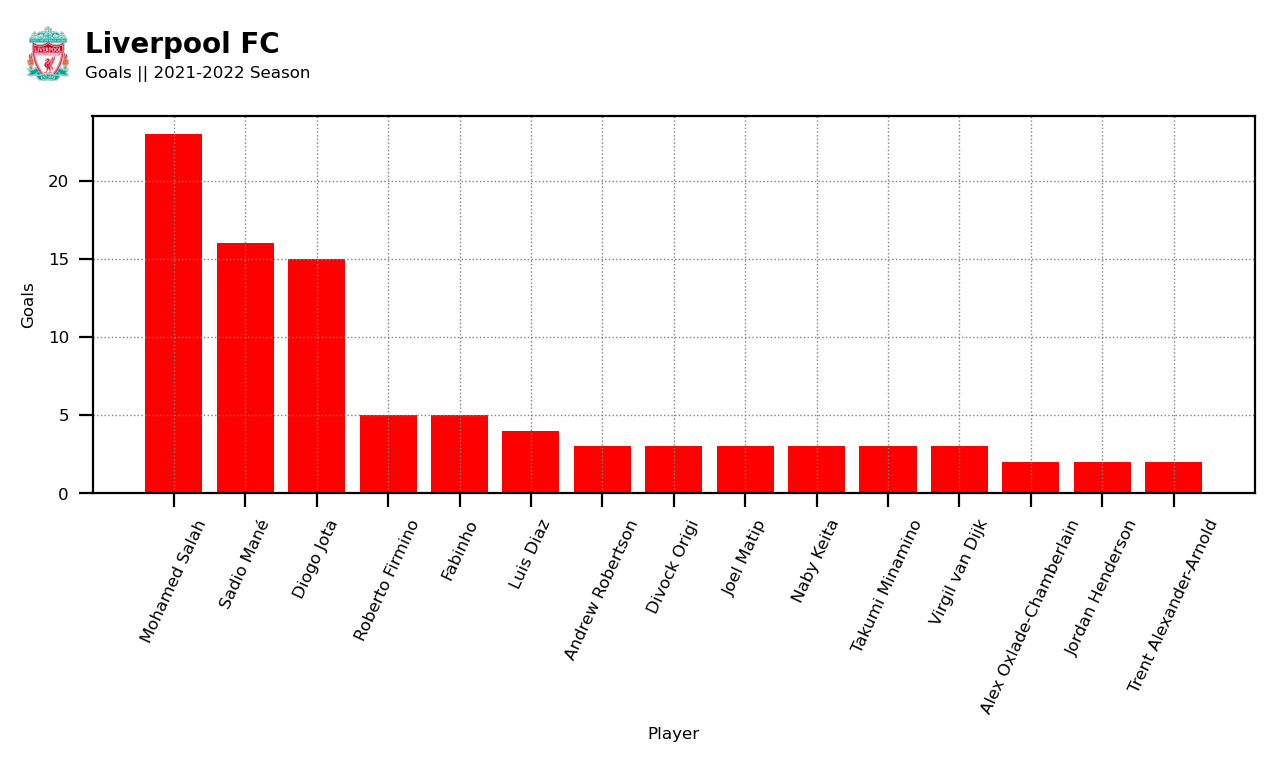

In [161]:
Liverpool_Stat_2022(xLiverpoolGoals2022, yLiverpoolGoals2022, "Goals")

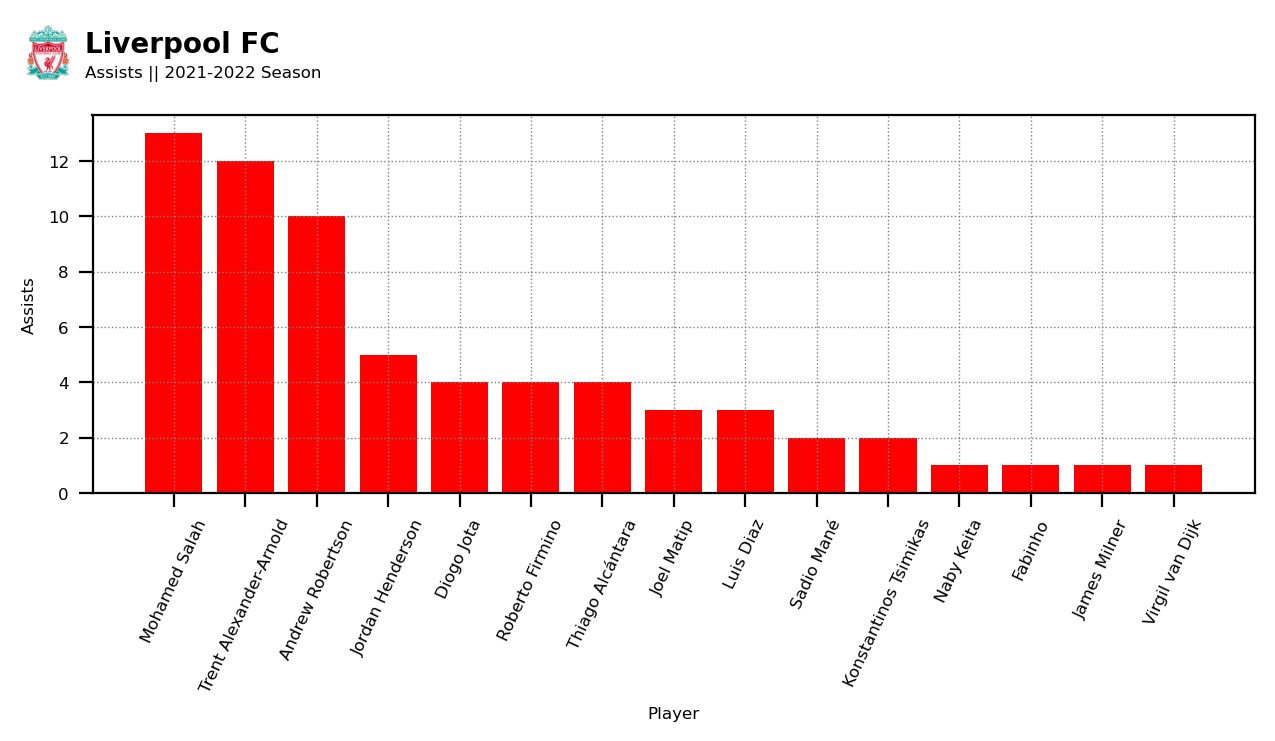

In [162]:
Liverpool_Stat_2022(xLiverpoolAssists2022, yLiverpoolAssists2022, "Assists")

In [199]:
def mo_salah_casestudy(df):
    
    mo_df = df.loc[(lambda df: df["Player"] == "Mohamed Salah"), ["Goals", "Assists"]]
    
    avg_goals = mo_df["Goals"].mean()
    avg_assists = mo_df["Assists"].mean()
    total_goals = mo_df["Goals"].sum()
    total_assists = mo_df["Assists"].sum()
    
    print("""Mo Salah arrived in 2017, and since then he has averaged {} goals and {} assists per season, bagging {} goals and {} assists in total in just 5 seasons in red.""".format(avg_goals, avg_assists, total_goals, total_assists))
    
    return mo_df

In [200]:
mo_salah_casestudy(df)

Mo Salah arrived in 2017, and since then he has averaged 23.6 goals and 9.2 assists per season, bagging 118.0 goals and 46.0 assists in total in just 5 seasons in red.


,,Goals,Assists
Year,Club,,
2018,Liverpool,32.0,10.0
2019,Liverpool,22.0,8.0
2020,Liverpool,19.0,10.0
2021,Liverpool,22.0,5.0
2022,Liverpool,23.0,13.0


In [153]:
# engine = create_engine("sqlite:///PLData_Final.db", echo = False)
# df = df.reset_index()
# df.to_sql("PLData_Final.db", con = engine, index_label = "ID", if_exists = "replace")

In [168]:
df = df.set_index(["Year", "Club"])
df_Lpool2022 = df.loc[("2022", "Liverpool"), ["Player", "Goals", "Assists", "Goals per 90", "Shots on Target per 90", "Shots per 90", "Accurate Passes per 90", "Big Chances Created", "Accurate Long Balls per 90", "Successful Dribbles per 90", "Big Chances Missed", "Penalties Won", "Successful Tackles per 90", "Interceptions per 90", "Clearances per 90", "Blocks per 90", "Possession Won In Final 3rd per 90"]]
df_Lpool2022_top10 = df_Lpool2022.iloc[0:10]
df_Lpool2022_top10

Player  Goals  Assists  Goals per 90  \
Year Club                                                        
2022 Liverpool     Mohamed Salah   23.0     13.0          0.75   
     Liverpool        Sadio Mané   16.0      2.0          0.51   
     Liverpool        Diogo Jota   15.0      4.0          0.57   
     Liverpool   Roberto Firmino    5.0      4.0          0.46   
     Liverpool           Fabinho    5.0      1.0          0.19   
     Liverpool         Luis Diaz    4.0      3.0           NaN   
     Liverpool  Andrew Robertson    3.0     10.0          0.11   
     Liverpool      Divock Origi    3.0      NaN           NaN   
     Liverpool        Joel Matip    3.0      3.0          0.10   
     Liverpool        Naby Keita    3.0      1.0          0.23   

                Shots on Target per 90  Shots per 90  Accurate Passes per 90  \
Year Club                                                                      
2022 Liverpool                     2.0           4.5                    28.1   
     Liverpool                     1.2           3.1                    25.5   
     Liverpool                     1.3           3.4                    21.1   
     Liverpool                     1.0           2.7                    35.0   
     Liverpool                     0.4           0.8                    52.4   
     Liverpool                     NaN           NaN                     NaN   
     Liverpool                     0.3           0.6                    58.2   
     Liverpool                     NaN           NaN                     NaN   
     Liverpool                     0.3           1.1                    66.2   
     Liverpool                     0.5           2.0                    49.0   

                Big Chances Created  Accurate Long Balls per 90  \
Year Club                                                         
2022 Liverpool                 18.0                         0.6   
     Liverpool                  9.0                         0.8   
     Liverpool                  7.0                         0.3   
     Liverpool                  3.0                         0.9   
     Liverpool                  2.0                         2.4   
     Liverpool                  2.0                         NaN   
     Liverpool                  9.0                         2.1   
     Liverpool                  NaN                         NaN   
     Liverpool                  4.0                         3.5   
     Liverpool                  2.0                         1.1   

                Successful Dribbles per 90  Big Chances Missed  Penalties Won  \
Year Club                                                                       
2022 Liverpool                         1.7                17.0            2.0   
     Liverpool                         1.5                13.0            1.0   
     Liverpool                         1.0                14.0            2.0   
     Liverpool                         1.6                 1.0            NaN   
     Liverpool                         0.4                 3.0            NaN   
     Liverpool                         NaN                 3.0            NaN   
     Liverpool                         0.5                 NaN            NaN   
     Liverpool                         NaN                 NaN            NaN   
     Liverpool                         0.3                 2.0            NaN   
     Liverpool                         1.2                 1.0            NaN   

                Successful Tackles per 90  Interceptions per 90  \
Year Club                                                         
2022 Liverpool                        0.3                   0.2   
     Liverpool                        0.6                   0.3   
     Liverpool                        0.7                   0.2   
     Liverpool                        1.3                   0.4   
     Liverpool                        1.0                   1.6   
     Liverpool           

In [ ]:
f.close()